# DataCamp Certification Case Study

### Project Brief

Congratulations, you have just landed your first job as a data scientist at Nearly New Nautical! Nearly New Nautical is a website that allows users to advertise their used boats for sale. To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views. 

The product manager wants to know if you can develop a model to predict the number of views a listing will receive based on the boat's features. She would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.

In addition, she has noticed that many users never complete the introductory survey to list their boat. She suspects that it is too long and has asked you whether some features are more predictive of views than others. If so, she may be able to trim the length of the survey and increase the number of people who sign up.

You will need to present your findings in two formats:
- First, you will need to present your findings to the product manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

# <div align="center">Analysis and prediction of the number of views for boats </div>

###  <div align="center">July 9 2022 </div>

<img src="https://www.selestiboat.com/cache/image_bd2f940e16bba1adcd1c1bfd3b9e8787.jpeg" width="800" height="400" alt="logo">

# Work Plan


My goal in this project is to explore, analyze and predict the popularity of a boat listing represented by its number of views in the last 7 days based on its different characteristics present in our dataset. The steps I followed to resolve the issue I was asked are as follows:
- Present my motivation for this work.
- Exploration of the raw data set.
- Clean the data and assess its quality.
- Realization of statistics and data visualization which is mainly a bivariate analysis to explore the relationship between the number of views of the boat listing in the last 7 days and other numerical and categorical characteristics.
- Build an appropriate machine learning model to predict the number of boat list views in addition to evaluating the performance of the model and then evaluating the predictive importance of the features.

# 1.PROJECT MOTIVATION <a name="project_motivation"></a>

The objective of this project is to use statistical and machine learning tools to increase traffic to the boat listing website and that is by preventing the listing of boats that would not receive a high number of views.

To accomplish this mission, my goal is to explore the factors influencing the popularity of boat ads (number of views) in order to predict them.

In addition to this, one of the issues encountered is that many of the surveys listed are not complete, so in this analysis the predictive power of features would be assessed so that features with low impact on boat popularity would be suggested for  exclugion in the future surveys in order to increase the number of people who sign up.

# 2.DATASET Description

**<div align="center"> Table 1. Raw dataset description</div>**
<div align="center">
<table style="border: 1px solid black; text-align:center">
  <tr style="border: 1px solid black; text-align:center">
    <th style="border: 1px solid black; text-align:center">Variable Name</th>
    <th style="border: 1px solid black; text-align:center">Description</th>
    <th style="border: 1px solid black; text-align:center">Type</th>
    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Number of views last 7 days</td>
    <td style="border: 1px solid black; text-align:center">Number of the views of the list last 7 days</td>
    <td style="border: 1px solid black; text-align:center">Numeric</td>
    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Price</td>
    <td style="border: 1px solid black; text-align:center">Boat price listed in different currencies on the website</td>
    <td style="border: 1px solid black; text-align:center">Character</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Boat Type</td>
    <td style="border: 1px solid black; text-align:center">Type of the boat</td>
    <td style="border: 1px solid black; text-align:center">Character</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Manufacturer</td>
    <td style="border: 1px solid black; text-align:center">Manufacturer of the boat</td>
    <td style="border: 1px solid black; text-align:center">Character</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Type</td>
    <td style="border: 1px solid black; text-align:center">Condition of the boat and engine type</td>
    <td style="border: 1px solid black; text-align:center">Character</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Year Built</td>
    <td style="border: 1px solid black; text-align:center">Year of the boat built</td>
    <td style="border: 1px solid black; text-align:center">Numeric</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Length</td>
    <td style="border: 1px solid black; text-align:center">Length in meter of the boat</td>
    <td style="border: 1px solid black; text-align:center">Numeric</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Width</td>
    <td style="border: 1px solid black; text-align:center">Width in meter of the boat</td>
    <td style="border: 1px solid black; text-align:center">Numeric</td>
  </tr>
   </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Material</td>
    <td style="border: 1px solid black; text-align:center">Material of the boat</td>
    <td style="border: 1px solid black; text-align:center">Character</td>
  </tr>
   </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Location</td>
    <td style="border: 1px solid black; text-align:center">Location of the boat is listed</td>
    <td style="border: 1px solid black; text-align:center">Character</td>
  </tr>
    </tr>

  </tr>
</table>
</div>

## Libraries and Data import

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from datetime import date
from sklearn.metrics import explained_variance_score

#import catboost as cb

pd.set_option("display.precision",2)
plt.style.use("fivethirtyeight")

In [ ]:
#importing Data
boat = pd.read_csv("data/boat_data.csv")

#printing the first 5 values of the dataset
boat

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
...,...,...,...,...,...,...,...,...,...,...
9883,CHF 4900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116
9884,EUR 4516,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354
9886,EUR 4300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266


At first glance, I noticed that there are missing values in this data set and some outliers. On top of that, categorical variables require a transformation, as is the case for the "Price" variable which I need to transform into a numerical variable.
Therefore, the first step of this work is "DATA CLEANING".

In [ ]:
boat.shape

(9888, 10)

The raw data set that I used in my work to solve the problem is composed of 9888 observations and 10 variables.

# 3.DATA CLEANING

## 3.1 Handeling Missing Values

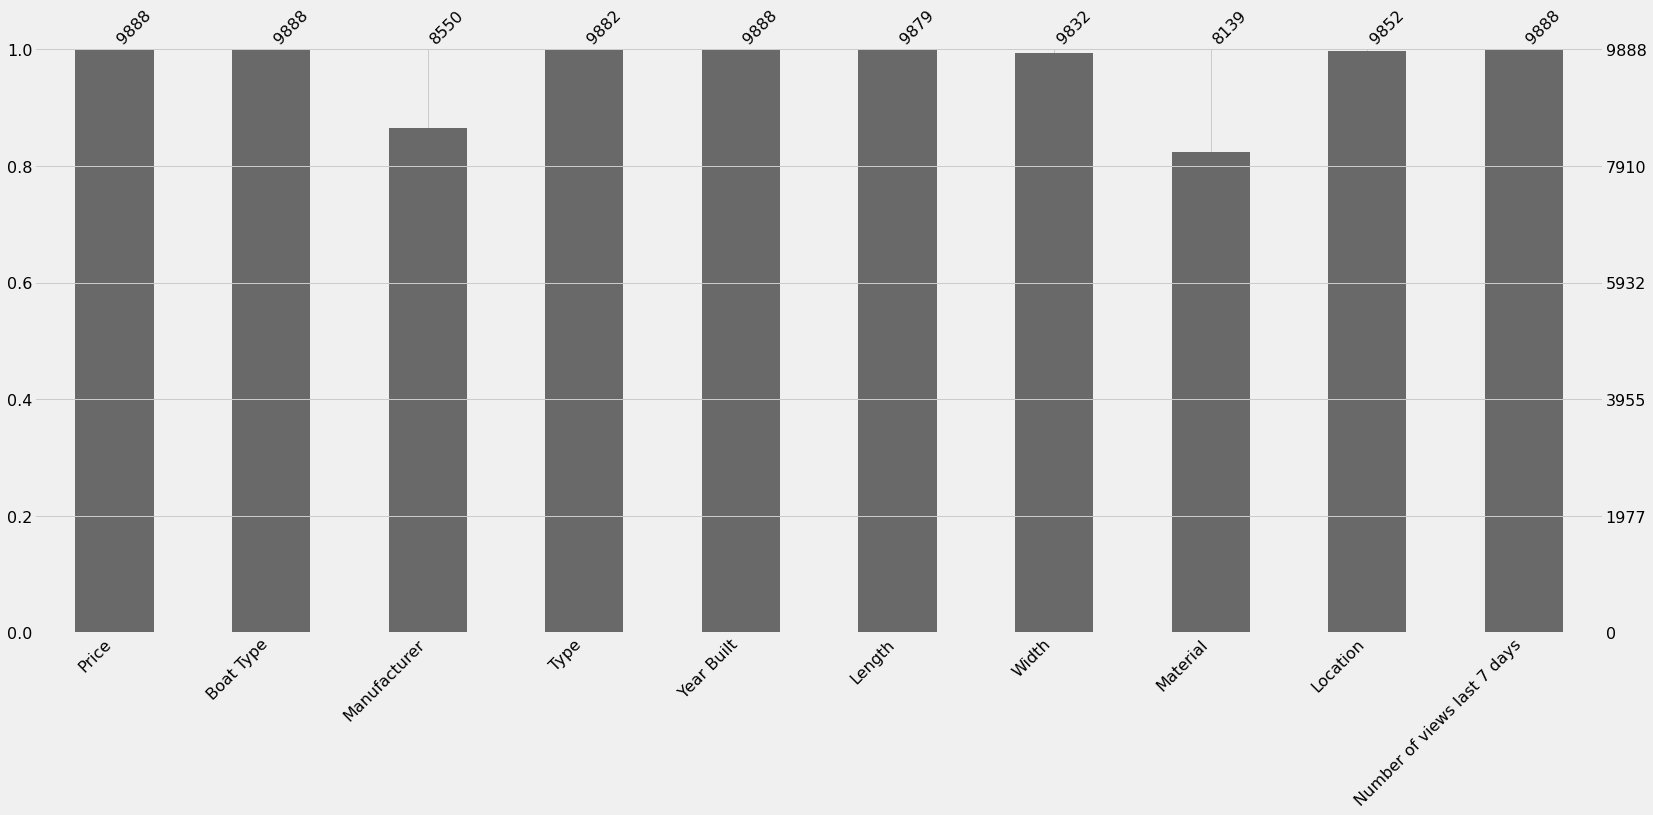

In [ ]:
msno.bar(boat)
plt.savefig('missing_values.jpeg')
plt.show()

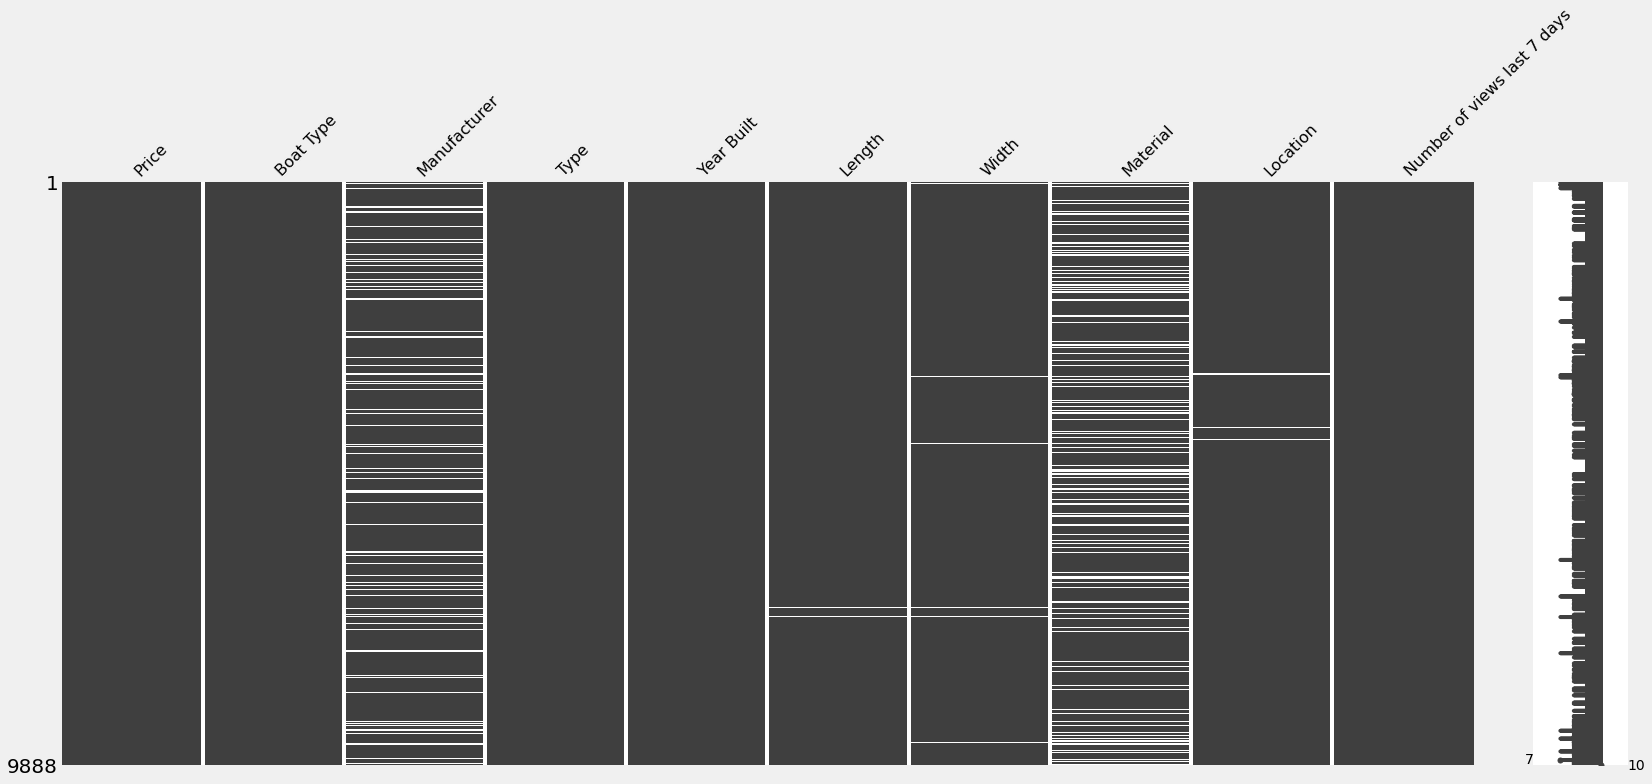

In [ ]:
msno.matrix(boat)
plt.show()

In [ ]:
# Checking the missing values
boat.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

I observe that the "Material" column contains the most missing values (1749), followed by the "Manufacturer" column (1338). The columns "Type", "Length", "Width" and "Location" also contain some missing values.

In this work, I handled missing values by deleting rows where missing values exist.

In [ ]:
# Dropping the records where missing values exists.
boat.dropna(inplace = True)

# Checking the missing values
boat.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [ ]:
boat.shape

(7019, 10)

Now, we observe the there is no more missing values in this dataset. However, the number of observations decreased to 7019 observations.

## 3.2 Renaming Weekly Views Column

In [ ]:
#renaming "Number of views last 7 days" columns to an easier name to work with like 'Views'
boat.rename(columns={'Number of views last 7 days': 'Views'}, inplace = True)
boat.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Views'],
      dtype='object')

## 3.3 Cleaning "Price" feature 

In [ ]:
boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Views
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239


I observe that the "Price" column is of character type and that it is composed of the currency code (EUR, CHF, etc.) and the respective amount. My goal is to turn the price column into a numeric type where all amounts are in the same unit that I have chosen to be in euros.

In [ ]:
# Discovering the different currencies present in my data
print(boat['Price'].apply(lambda x: x.split(' ')[0]).unique())


['EUR' 'CHF' 'DKK' 'Â£']


'EUR' 'CHF' 'DKK' 'Â£' are the 4  different currency in this dataset, and I converted them to the same unit which is in EUR

In [ ]:
#Creating a dictionary do different types of exchange rate with respect to euro
#Source for exchange rate : https://www.xe.com/currencyconverter/
currency = {'CHF': 1.01, 'EUR': 1.0, 'DKK': 0.134, 'Â£':1.18}


In [ ]:
def exchange_currency(row):
    split = row.split(' ')
    return float(split[1]) * currency[split[0]]



In [ ]:
boat['Currency'] = boat['Price'].apply(lambda x: str(x).split(' ')[0])
boat['Price_EUR'] = boat['Price'].apply(exchange_currency) # Creating new price column that has the price amount of all boats in the same unit which in in euro

boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Views,Currency,Price_EUR
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.0
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3807.7
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.0
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3686.5
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3535.0


In [ ]:
#droping "Price" and "Currency" columns since "Price_EUR" is created
boat  = boat.drop(['Price', 'Currency'], axis= 1)

boat.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Location', 'Views', 'Price_EUR'],
      dtype='object')

## 3.4 Transforming Manufacturer variables

In [ ]:

print(boat.Manufacturer.nunique())

823


In [ ]:
boat.Manufacturer.value_counts()

BÃ©nÃ©teau power boats    539
Jeanneau power boats      431
Sunseeker power boats     333
Sea Ray power boats       208
Princess power boats      183
                         ... 
Ta Yang power boats         1
D-Boat power boats          1
Sossego power boats         1
Pirelli power boats         1
AYROS power boats           1
Name: Manufacturer, Length: 823, dtype: int64

In [ ]:
boat.Manufacturer.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

BÃ©nÃ©teau power boats    7.68%
Jeanneau power boats      6.14%
Sunseeker power boats     4.74%
Sea Ray power boats       2.96%
Princess power boats      2.61%
                          ...  
Ta Yang power boats       0.01%
D-Boat power boats        0.01%
Sossego power boats       0.01%
Pirelli power boats       0.01%
AYROS power boats         0.01%
Name: Manufacturer, Length: 823, dtype: object

I see there are a lot of unique manufacturers, but there are also a lot with a very small percentage. Therefore, manufacturers with a percentage lower than 0.5% will be replaced by "others" (new category created) in order to simplify the data.

In [ ]:
repetition = boat["Manufacturer"].str.contains("power boats").sum()
print('In Manufacture column, the string \'power boats\' is repeated {} times.'.format(repetition))
print('The lenth of the dataset is {}.'.format(boat.shape[0]))

In Manufacture column, the string 'power boats' is repeated 7019 times.
The lenth of the dataset is 7019.


Since 'power boats' is repeated in all case i will delete it for simplification purpose

In [ ]:
boat["Manufacturer"] = boat["Manufacturer"].replace({" power boats":""}, regex=True)
boat['Manufacturer'].head()

1      Terhi
2     Marine
4     Linder
5     Linder
10     Terhi
Name: Manufacturer, dtype: object

In [ ]:
boat.Manufacturer.value_counts(normalize=True).loc[lambda x : x > 0.005]


BÃ©nÃ©teau                        7.68e-02
Jeanneau                          6.14e-02
Sunseeker                         4.74e-02
Sea Ray                           2.96e-02
Princess                          2.61e-02
Cranchi                           2.58e-02
Azimut                            2.42e-02
Quicksilver (Brunswick Marine)    2.19e-02
Fairline                          1.88e-02
Bavaria                           1.80e-02
Bayliner                          1.64e-02
Sessa                             1.55e-02
Prestige Yachts                   1.50e-02
Sealine                           1.48e-02
Quicksilver                       1.35e-02
Regal                             1.03e-02
Galeon                            9.55e-03
Linssen                           9.40e-03
Riva                              8.69e-03
Windy                             8.41e-03
Parker                            8.41e-03
Boesch                            7.27e-03
Ferretti                          6.98e-03
Nimbus     

I remark that the number of Manufacturer descreases significantly when I put the constraint that I want their percentage size to be greater then 0.5 %. Therefore I see that there is lot of "Manufacturers" tuat represents a small percentage of the data that is less then 0.5 %. For those cases, I created a category called others

In [ ]:
#creating a list that contains all manufacturers that represent a percentage less than 0.05 %
list_maufact =  list(boat.Manufacturer.value_counts(normalize=True).loc[lambda x : x < 0.005].to_frame().index)

boat.loc[boat['Manufacturer'].isin(list_maufact), 'Manufacturer'] = 'Others'


boat.Manufacturer.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Others                            46.7%
BÃ©nÃ©teau                        7.68%
Jeanneau                          6.14%
Sunseeker                         4.74%
Sea Ray                           2.96%
Princess                          2.61%
Cranchi                           2.58%
Azimut                            2.42%
Quicksilver (Brunswick Marine)    2.19%
Fairline                          1.88%
Bavaria                            1.8%
Bayliner                          1.64%
Sessa                             1.55%
Prestige Yachts                    1.5%
Sealine                           1.48%
Quicksilver                       1.35%
Regal                             1.03%
Galeon                            0.95%
Linssen                           0.94%
Riva                              0.87%
Windy                             0.84%
Parker                            0.84%
Boesch                            0.73%
Ferretti                           0.7%
Nimbus                            0.61%


## 3.5 Transforming Location Column

In [ ]:
boat.Location.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Croatia (Hrvatska)                          2.88%
Netherlands Â» In verkoophaven              2.59%
Italy Â» Toscana Â» Toscana                 1.52%
France                                      1.45%
Italy Â» Mar Tirreno                        1.34%
                                            ...  
Switzerland Â» Zugersee Â» Ruswil           0.01%
Australia Â» Perth                          0.01%
Spain Â» DENIA, Espagne                     0.01%
Switzerland Â» Murtensee Â» Vallamand VD    0.01%
Switzerland Â» Adria                        0.01%
Name: Location, Length: 2365, dtype: object

I observe here that there are lots of locations (2365). Moreover, the first word in each location represents the country. Therefore to reduce the number of locations, I made the location based only on the country from which the boat is listed since I remarked that characters before Â represent the country.

In [ ]:

boat['Location'] = boat['Location'].apply(lambda x: str(x).split(" Â» ")[0])

boat.Location.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Germany               21.41%
Italy                 14.36%
Switzerland           14.33%
France                13.95%
Croatia (Hrvatska)     9.56%
                       ...  
Italien                0.01%
bodensee               0.01%
Calanova Mallorca      0.01%
TravemÃ¼nde            0.01%
Isle of Man            0.01%
Name: Location, Length: 105, dtype: object

Similarly, countries having a size less the 1 % will be converted to others

In [ ]:

list_loc = list(boat.Location.value_counts(normalize=True).loc[lambda x : x < 0.01].to_frame().index)
list_loc

['Greece',
 'Denmark',
 'Turkey',
 'Belgium',
 'Slovenia',
 'Malta',
 'Poland',
 'Finland',
 'Montenegro',
 'Sweden',
 'Slovak Republic',
 'Lake Constance',
 'Monaco',
 'Lake Geneva',
 'Cyprus',
 'Russian Federation',
 'Hungary',
 'Estonia',
 'Donau',
 'United States',
 'Czech Republic',
 'Bulgaria',
 'Martinique',
 'Australia',
 'Ostsee',
 'Thailand',
 'Latvia',
 'ZÃ¼richse, 8855 Wangen SZ',
 'Adria',
 'Thalwil',
 'Mallorca ',
 'Beilngries ',
 'Steinwiesen',
 'Gibraltar',
 'PT Ã¸stkysten ellers Esbjerg ',
 'baden baden',
 'Katwijk ',
 'Seychelles',
 'Izola',
 'French Southern Territories',
 'Rolle',
 'Juelsminde Havn ',
 'Avenches',
 'Ibiza',
 'Ireland',
 'Dalmatien',
 'Morocco',
 'Oder',
 'Brandenburg an derHavel',
 'Romania',
 'Kroatien Krk',
 'Marina Punat',
 'Tenero, lago Maggiore',
 'Bremen',
 'Lago Maggiore, Minusio',
 'Thun',
 'Croatia',
 'Welschenrohr',
 'FuÃ\x9fach',
 'Jersey',
 'Greetsile/ KrummhÃ¶rn',
 'Serbia',
 'Angera ',
 'espa?a ',
 '24782 BÃ¼delsdorf ',
 'BelgiÃ«, Zult

In [ ]:
boat.loc[boat['Location'].isin(list_loc), 'Location'] = 'Others'


boat.Location.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Germany               21.41%
Italy                 14.36%
Switzerland           14.33%
France                13.95%
Croatia (Hrvatska)     9.56%
Spain                  7.54%
Netherlands            7.15%
Others                 6.97%
United Kingdom         1.99%
Portugal               1.65%
Austria                1.08%
Name: Location, dtype: object

## 3.6 Year Built Columns

### Removing outliers

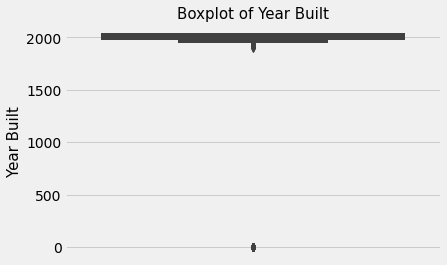

In [ ]:

ax = sns.boxplot(data=boat, y='Year Built')
ax.set_title('Boxplot of Year Built', fontsize=15)
ax.set_ylabel("Year Built", fontsize=15)

plt.show()
    

I see that there are boats where year built it zero therefore, these values are concidered outliers and needs to be removed

In [ ]:

boat = boat[boat['Year Built'] != 0]
boat.shape

(6589, 10)

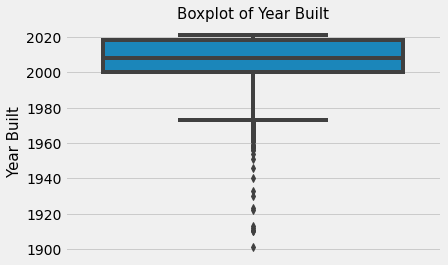

In [ ]:
ax = sns.boxplot(data=boat, y='Year Built')
ax.set_title('Boxplot of Year Built', fontsize=15)
ax.set_ylabel("Year Built", fontsize=15)

plt.show()

### Creating Age Columns

In [ ]:

year = date.today().year

boat['Age'] = year - boat['Year Built']

boat.Age.head()

1      2
4      3
10    35
12    18
13     2
Name: Age, dtype: int64

In [ ]:
#droping year built columns since age column is created

boat.drop(columns= ['Year Built'], inplace = True)

## 3.7 Type Column

In [ ]:

boat['Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'


Used boat,Diesel                44.88%
Used boat,Unleaded              20.22%
new boat from stock,Unleaded    11.11%
Used boat                       10.93%
new boat from stock              4.78%
new boat from stock,Diesel       2.32%
new boat on order,Unleaded       1.81%
Display Model,Unleaded           0.97%
new boat on order,Diesel         0.73%
new boat on order                 0.7%
Display Model,Diesel             0.24%
new boat from stock,Electric     0.23%
Used boat,Electric               0.23%
Unleaded                         0.21%
Diesel                           0.21%
Display Model                    0.17%
Used boat,Gas                    0.12%
Display Model,Electric           0.06%
new boat from stock,Gas          0.03%
Display Model,Gas                0.02%
Used boat,Propane                0.02%
new boat from stock,Hybrid       0.02%
Electric                         0.02%
Name: Type, dtype: object

Same as for Manufacturer and Location features, in Type feature, I see lots of type that represent very small percentage of total data, so to handle these cases, I converted that ones with small percentage to "Others"

In [ ]:

list_type = list(boat['Type'].value_counts(normalize=True).loc[lambda x : x < 0.01].to_frame().index)

boat.loc[boat['Type'].isin(list_type), 'Type'] = 'Others'


boat['Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Used boat,Diesel                44.88%
Used boat,Unleaded              20.22%
new boat from stock,Unleaded    11.11%
Used boat                       10.93%
new boat from stock              4.78%
Others                           3.96%
new boat from stock,Diesel       2.32%
new boat on order,Unleaded       1.81%
Name: Type, dtype: object

## 3.8 Boat Type Column

In [ ]:

boat['Boat Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Motor Yacht                                 27.58%
Sport Boat                                  14.33%
Flybridge                                   13.46%
Pilothouse                                   6.75%
Cabin Boat                                   6.27%
                                             ...  
Center console boat,Deck Boat,Sport Boat     0.02%
Bowrider,Center console boat,Sport Boat      0.02%
Hardtop,Mega Yacht,Motor Yacht               0.02%
House Boat,Motor Yacht                       0.02%
Classic,Motor Yacht,Sport Boat               0.02%
Name: Boat Type, Length: 109, dtype: object

Similalry, I see lots of boat unique boat type having a percentage less that 1 %. These cases will be converted to "Others"

In [ ]:

list_Boattype = list(boat['Boat Type'].value_counts(normalize=True).loc[lambda x : x < 0.01].to_frame().index)

boat.loc[boat['Boat Type'].isin(list_Boattype), 'Boat Type'] = 'Others'


boat['Boat Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Motor Yacht            27.58%
Sport Boat             14.33%
Flybridge              13.46%
Others                  8.03%
Pilothouse              6.75%
Cabin Boat              6.27%
Hardtop                  5.8%
Trawler                 5.01%
Center console boat     3.89%
Bowrider                3.11%
Deck Boat               2.69%
Fishing Boat             1.9%
Pontoon Boat             1.2%
Name: Boat Type, dtype: object

## 3.9 Data Cleaning Summary

In [ ]:

boat.shape

(6589, 10)

- After cleaning the data the number of observations decreased to 6589 obsevation.
- Material and Manufacturer columns contains the most missing values (greater than 1000)
- Price was in character type and after cleaning it was converted to numercial where all amount are in the same unit that is set to be in euros.
- Boats having a year built of 0 were removed from the data and an age column was created.
- The Unique values in Character columns that represents a very small percentage were converted to 'Others' character for simplification perpose in order to make to next statistical analysis more simple and clear.



# 4. Statictics and Visualizations

## 4.1 Discriptive Statistics for Numerical Data

In [ ]:
describe = boat.describe().round(2)
describe.to_csv('descriptive.csv')
describe

,Length,Width,Views,Price_EUR,Age
count,6589.00,6589.00,6589.00,6.59e+03,6589.00
mean,11.23,3.48,161.81,2.78e+05,15.21
std,5.18,1.12,170.82,7.46e+05,12.65
min,2.32,0.86,13.00,3.40e+03,1.00
25%,7.47,2.55,73.00,4.50e+04,4.00
50%,10.00,3.30,113.00,9.50e+04,14.00
75%,13.72,4.20,187.00,2.49e+05,22.00
max,56.00,16.00,3263.00,2.35e+07,121.00


## 4.2 Density Plot for View count

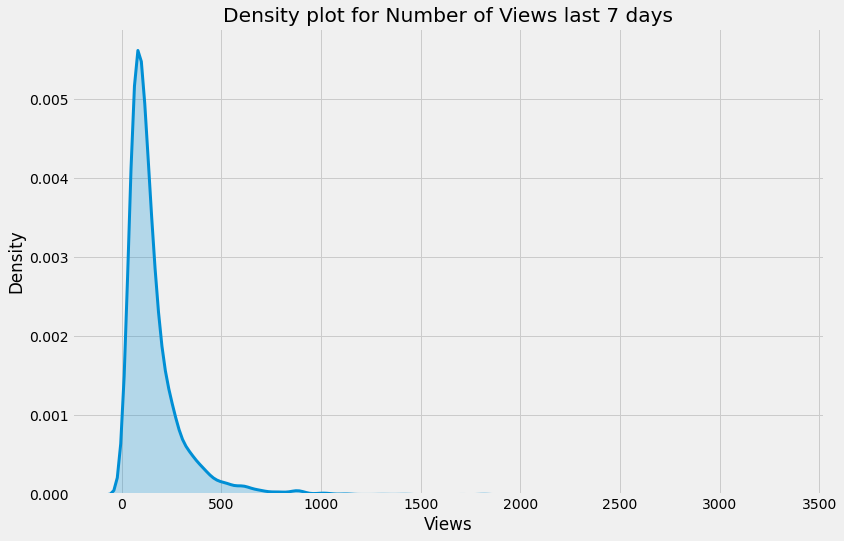

In [ ]:
plt.figure(figsize=[12,8])
sns.distplot(boat['Views'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Density plot for Number of Views last 7 days')
plt.savefig('density.jpeg')
plt.show()

## 4.3 Correlation Matrix for Numerical Features


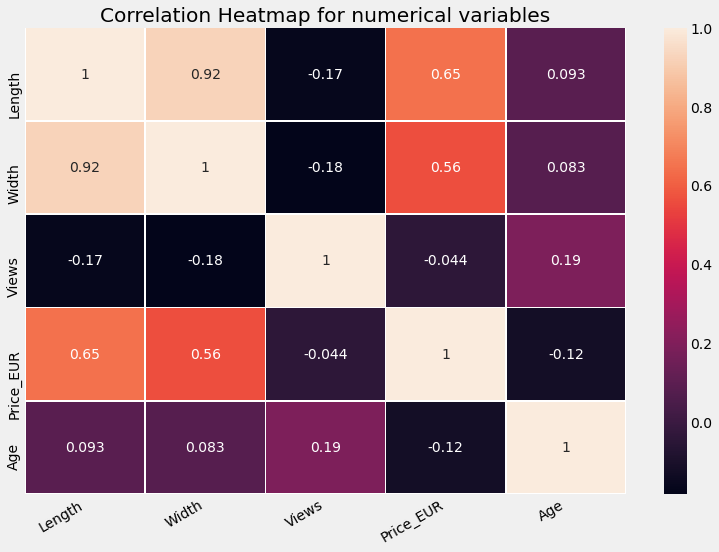

In [ ]:

# Correlation for numerical variable
corrmat = boat.corr()
#Pearson Correlation for numerical features
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.title('Correlation Heatmap for numerical variables')
plt.savefig('correlation.jpeg')
plt.show()

I see that there are weak correlations between boat's listing popularity (views last 7 days) and the other numerical features (age,price,width and length)

## 4.4 Ploting relation between Location and Views

In [ ]:
mean_views = boat['Views'].mean()
mean_views.round(2)

161.81

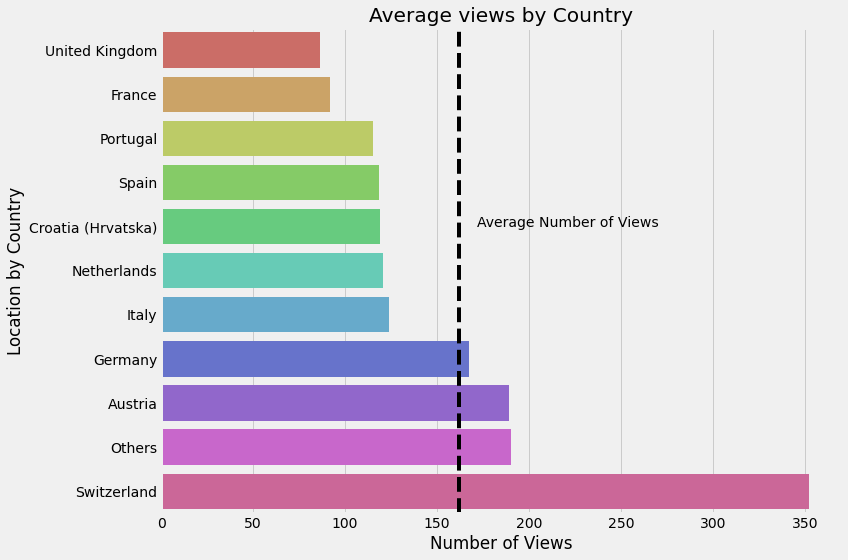

In [ ]:
group_location = boat.groupby(['Location']).agg({'Views' : np.mean}).reset_index().sort_values(by = ['Views'])

plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('pastel')
sns.barplot(y = 'Location',x = 'Views',data = group_location,palette = 'hls')
plt.xlabel('Number of Views')
plt.ylabel('Location by Country')
plt.title('Average views by Country')
plt.axvline(x = mean_views, color='black', linestyle='--')
plt.annotate(s ='Average Number of Views', xy =(mean_views +10 ,4)) 
plt.savefig('barlocation.jpeg')
plt.show()

## 4.5 Ploting relation between Boat Type and Views

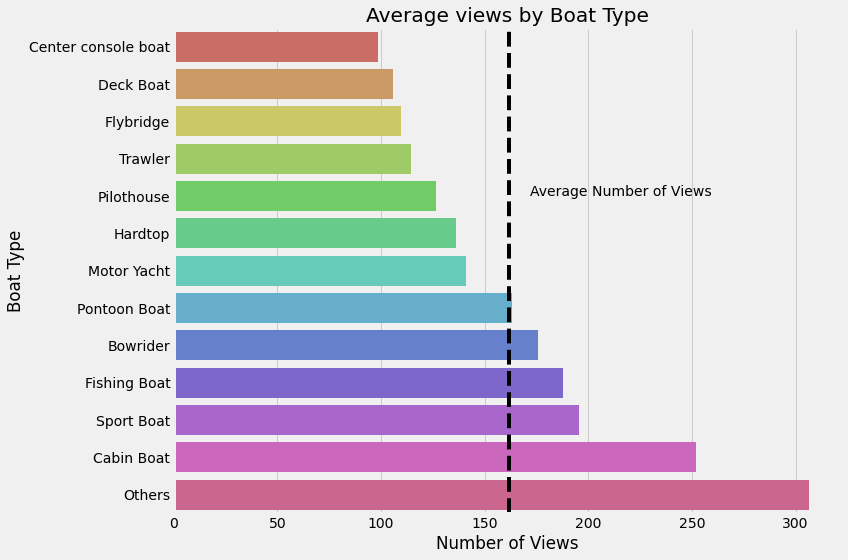

In [ ]:

group_boattype = boat.groupby(['Boat Type']).agg({'Views' : np.mean}).reset_index().sort_values(by = ['Views'])

plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('pastel')
sns.barplot(y = 'Boat Type',x = 'Views',data = group_boattype,palette = 'hls')
plt.xlabel('Number of Views')
plt.ylabel('Boat Type')
plt.title('Average views by Boat Type')
plt.axvline(x = mean_views, color='black', linestyle='--')
plt.annotate(s ='Average Number of Views', xy =(mean_views +10 ,4)) 


plt.savefig('barplotboattype.jpeg')
plt.show()

## 4.6 Ploting relation between Type and Views

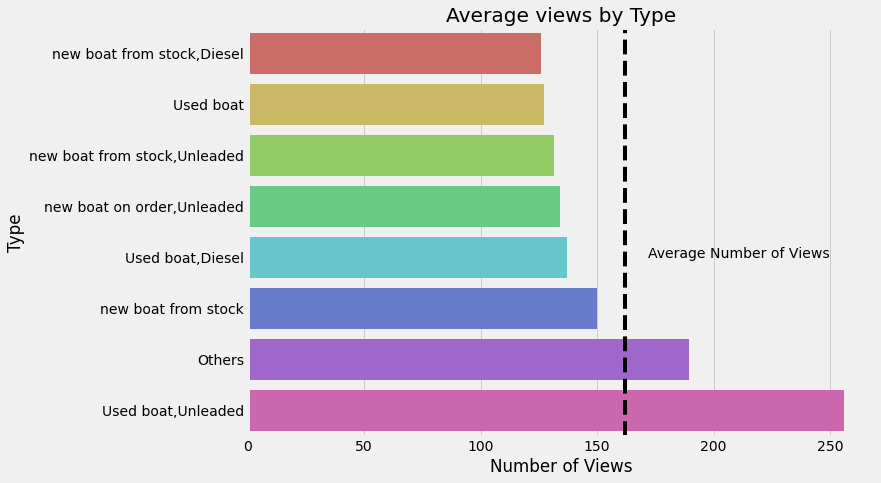

In [ ]:

group_boattype = boat.groupby(['Type']).agg({'Views' : np.mean}).reset_index().sort_values(by = ['Views'])

plt.figure(figsize=(10,7), tight_layout=False)
colors = sns.color_palette('pastel')
sns.barplot(y = 'Type',x = 'Views',data = group_boattype,palette = 'hls')
plt.xlabel('Number of Views')
plt.ylabel('Type')
plt.title('Average views by Type')
plt.axvline(x = mean_views, color='black', linestyle='--')
plt.annotate(s ='Average Number of Views', xy =(mean_views +10 ,4)) 

plt.savefig('barplottype.jpeg')
plt.show()

## 4.7 Ploting relation between Manufacturer and Views

In [ ]:


group_manufacturer = boat.groupby(['Manufacturer']).agg({'Views' : np.mean}).reset_index().sort_values(by = ['Views'])
group_manufacturer

,Manufacturer,Views
24,Sanlorenzo,78.05
7,Ferretti,82.06
4,BÃ©nÃ©teau,89.82
18,Prestige Yachts,89.84
12,Jeanneau,99.39
0,Azimut,114.37
16,Parker,121.97
27,Sessa,129.24
28,Sunseeker,130.58
21,Quicksilver (Brunswick Marine),139.92


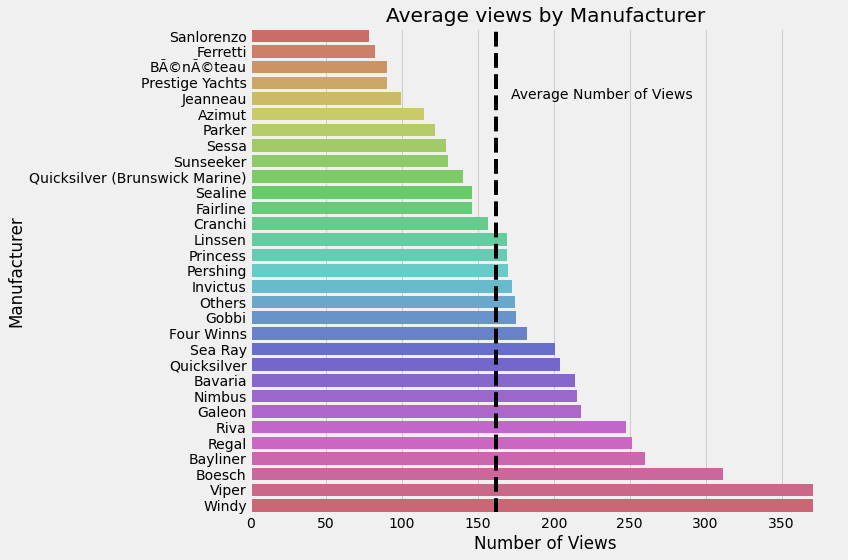

In [ ]:
plt.figure(figsize=(12,8), tight_layout=True)
colors = sns.color_palette('pastel')
sns.barplot(y = 'Manufacturer',x = 'Views',data = group_manufacturer,palette = 'hls')
plt.xlabel('Number of Views')
plt.ylabel('Manufacturer')
plt.title('Average views by Manufacturer')
plt.axvline(x = mean_views, color='black', linestyle='--')
plt.annotate(s ='Average Number of Views', xy =(mean_views +10 ,4)) 
plt.savefig('barplotmanufac.jpeg')
plt.show()

## 4.8 Ploting relation between Material and Views

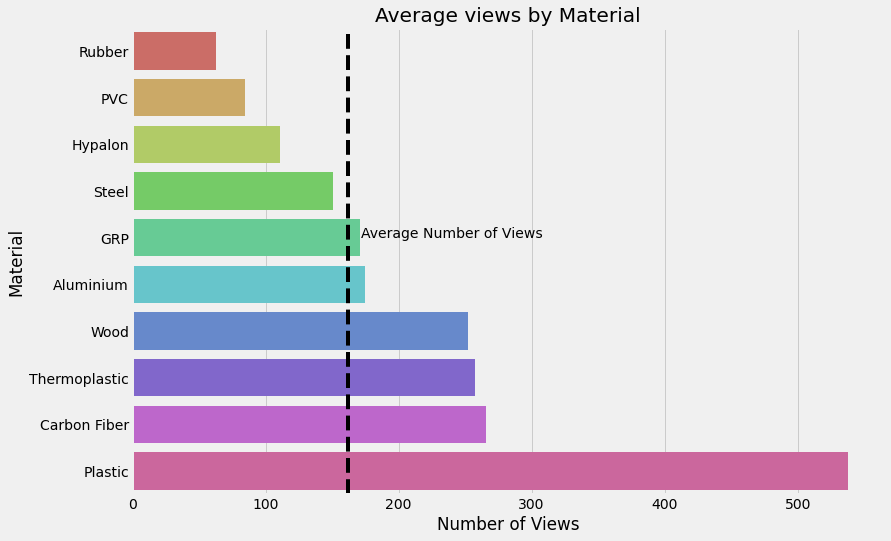

In [ ]:

group_material = boat.groupby(['Material']).agg({'Views' : np.mean}).reset_index().sort_values(by = ['Views'])

plt.figure(figsize=(12,8), tight_layout=False)
colors = sns.color_palette('pastel')
sns.barplot(y = 'Material',x = 'Views',data = group_material,palette = 'hls')
plt.xlabel('Number of Views')
plt.ylabel('Material')
plt.title('Average views by Material')
plt.axvline(x = mean_views, color='black', linestyle='--')
plt.annotate(s ='Average Number of Views', xy =(mean_views +10 ,4)) 

plt.savefig('barplotmaterial.jpeg')
plt.show()

## 4.9 Plotting the realtion between boat's popularity and numerical variables

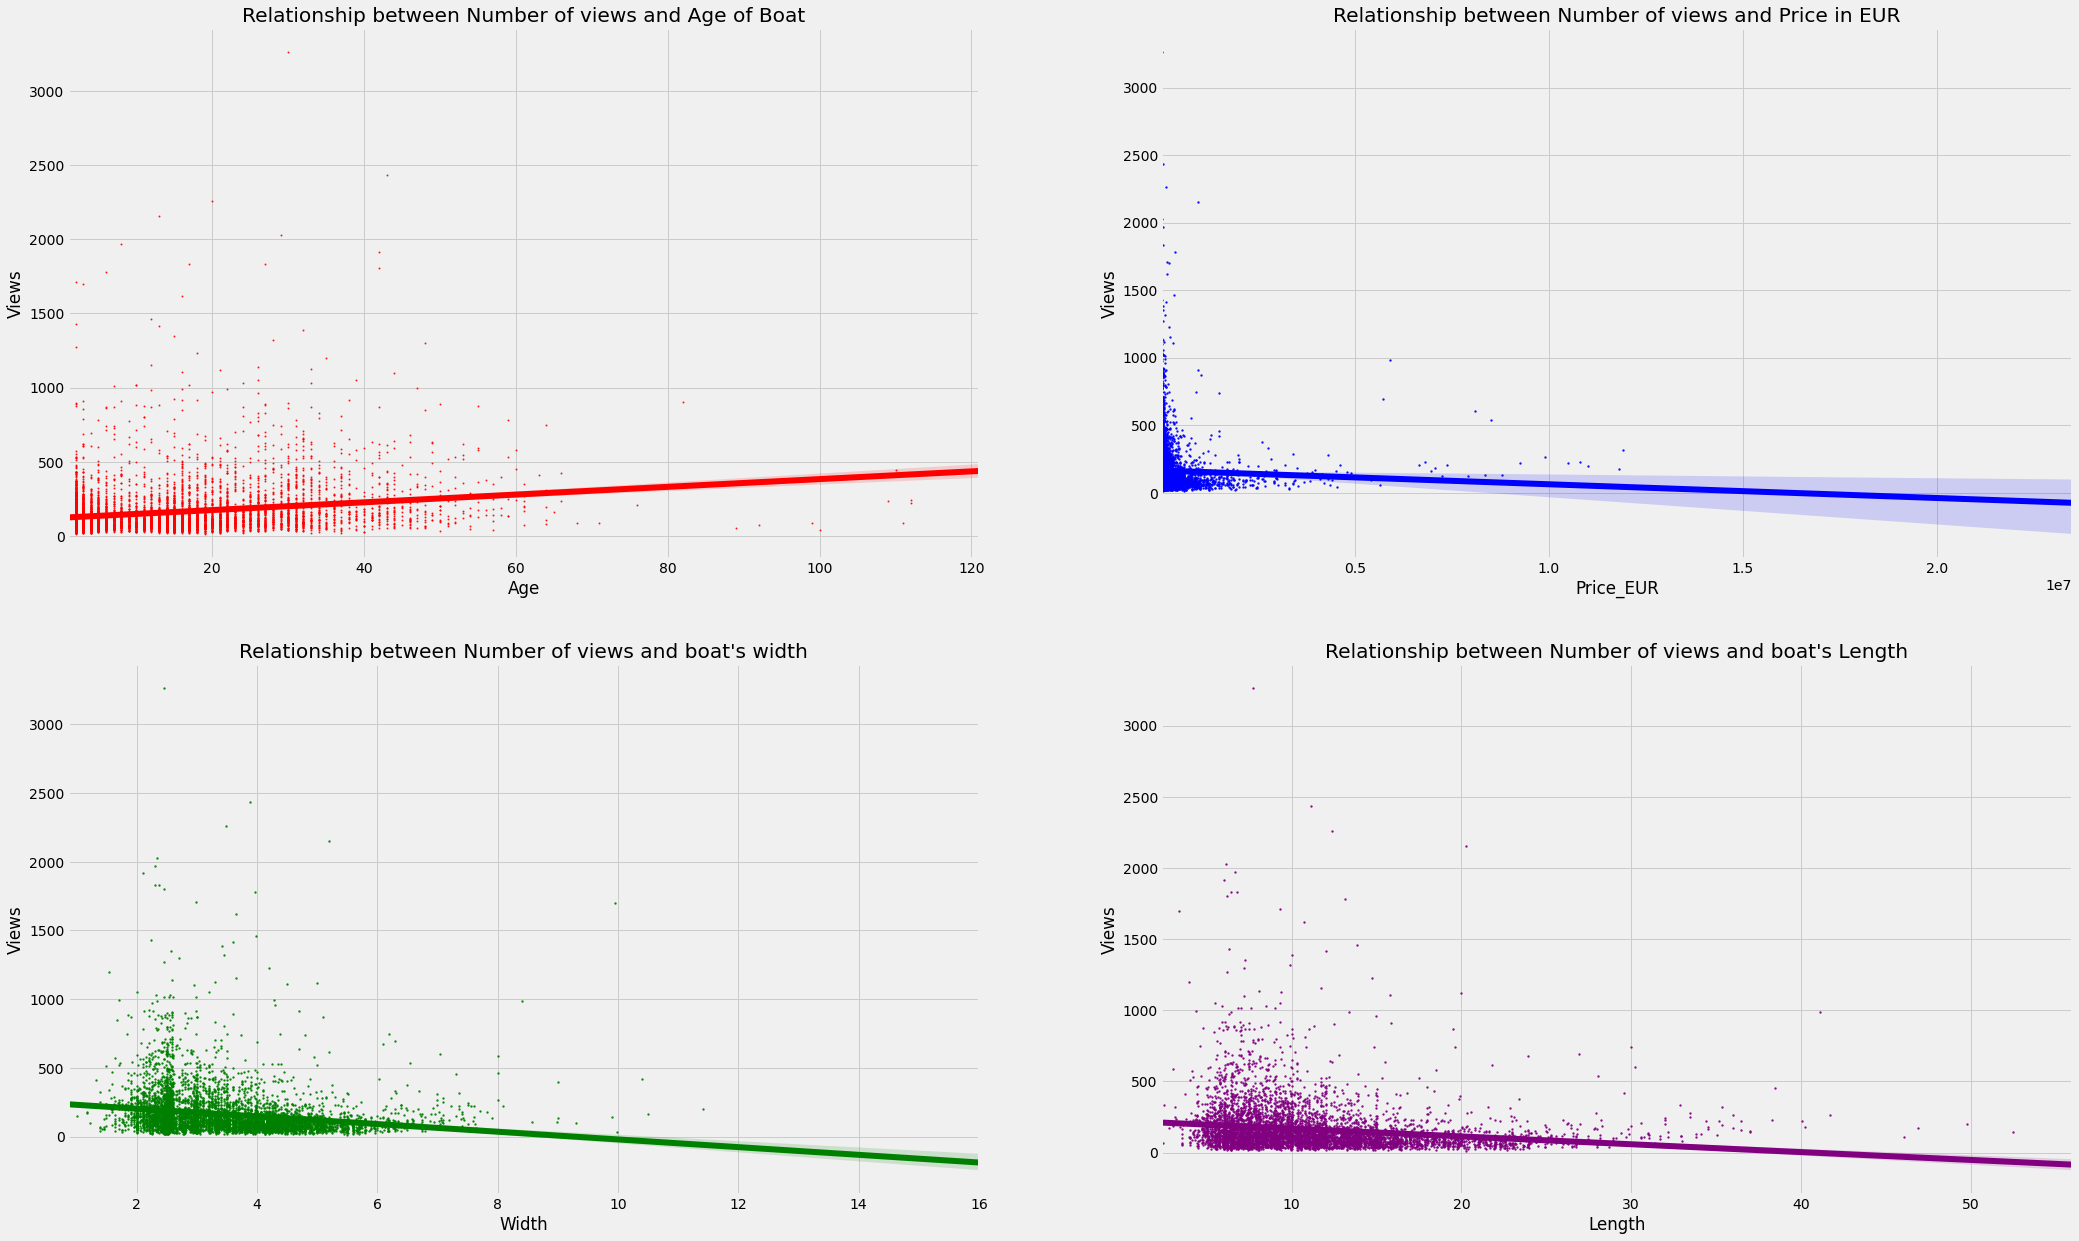

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(32,20))

sns.regplot(ax=axes[0, 0],y = 'Views',x = 'Age', data = boat,marker='o', color='red', scatter_kws={'s':1})
axes[0, 0].set_title('Relationship between Number of views and Age of Boat')

sns.regplot(ax=axes[0, 1],y = 'Views',x = 'Price_EUR',  data = boat,marker='o', color='blue', scatter_kws={'s':2})
axes[0, 1].set_title('Relationship between Number of views and Price in EUR')

sns.regplot(ax=axes[1, 0],y = 'Views',x = 'Width',  data = boat,marker='o', color='green', scatter_kws={'s':2})
axes[1, 0].set_title('Relationship between Number of views and boat\'s width')

sns.regplot(ax=axes[1, 1],y = 'Views',x = 'Length',  data = boat,marker='o', color='purple', scatter_kws={'s':2})
axes[1, 1].set_title('Relationship between Number of views and boat\'s Length')

fig.savefig("regplot.png")
fig.show()

## 4.10 Summary Statistics and Data Visualization

- The mean values of number of views is 161 and 50 % of boats have view less than 113, this was present is descriptive statistic and density plot that skewed to the right wich indicated that the mean in greater than the median.
- The standard deviation of number of views is higher than the mean and that indicates that the values are very spreaded.
- There is a very weak linear correlation between then number of views and length, width and price features (negative weak correlation).
- There is also weak correlation between views and price but it is positive weak correlation.
- Correlaton and regression plots presented this weak correlation.
- On average boats located in Switzerland gets the highest number of views whereas those located in United Kingdom get the lowest.
- On average, Cabine baots and other minority type boats (Others) get high number of views whereas center console boats gets the lowest number.
- On average, used boats uleaded gets the highest number of views whereas "new boat from stock, diesel" get the lowest number of views.
- On average, "windy" and "Viper" Manufacturer get the highest number of view (eventhough they still represent small percentage of manufacturers) and Sanlorenzo gets the lowest number of views.
- On average, plastic boats gets the highest number of views (above 500) whereas ruber boats gets the lowest number of views (below 100).
- The values that gets high number of views are recommended to list more in order to boost traffic

# 5.Developing, Fitting and Evaluating Machine Learning Model

In this work, I chose Catboost regression model from "catboost" library. This model is built upon the theory of decision trees and gradiant boosting. It's known in machine learning that categorical features should be transformed to numerical form (by one hot encoding for exemple) before inputting them to the model. What make Catboost model special is that I don't need to do one hot encoding to my categorical features that contains lots on unique values which could force me to create a dummy variable for each unique value, and that would create eventually a very big dataset that takes lots of memory storage.
In summary Catboost model can handel the categorical features for us in addition that it has good performance.

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 28.0 MB/s            
     |████████████████████████████████| 41.6 MB 85.8 MB/s            
     |████████████████████████████████| 11.3 MB 84.9 MB/s            
     |████████████████████████████████| 17.1 MB 93.0 MB/s            
     |████████████████████████████████| 11.7 MB 90.5 MB/s            
     |████████████████████████████████| 15.2 MB 101.3 MB/s            
     |████████████████████████████████| 46 kB 12.6 MB/s            
     |████████████████████████████████| 247 kB 107.0 MB/s            
     |████████████████████████████████| 503 kB 105.0 MB/s            
     |████████████████████████████████| 98 kB 18.0 MB/s             
     |████████████████████████████████| 3.2 MB 94.5 MB/s            
     |████████████████████████████████| 40 kB 16.7 MB/s            
     |████████████████████████████████| 944 kB 105.0 MB/s            
     |████████████████████████████████| 1.2 MB 115.7 MB/s            
ERROR: pip's dependency r

In [ ]:
import catboost as cb

## 5.1 Developing the model

In [ ]:
X = boat.drop(['Views'], axis = 1) # Features
Y = boat['Views'] # Target
X.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Length', 'Width', 'Material',
       'Location', 'Price_EUR', 'Age'],
      dtype='object')

In [ ]:
# Selecting the categorical features for CatBoost model
categorical_features = [0,1,2,5,6] # 'Boat Type', 'Manufacturer','Type','Material','Location'  are the categorical features

In [ ]:
#splitting the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

In [ ]:
train = cb.Pool(X_train, y_train, cat_features = categorical_features ) 
test = cb.Pool(X_test, y_test, cat_features = categorical_features )

## 5.2 Model Fitting

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE') # the loss function I chose is Root Mean Squared Errors.

In [ ]:
grid = {'iterations': [100, 150, 200], # maximum number of trees that can be used
        'learning_rate': [0.03, 0.1], # Learning rate
        'depth': [2, 4, 6, 8], # Depth of the tree
        'l2_leaf_reg': [0.2, 0.5, 1, 3]} # L2 regularisation coefficient of the loss function.

In [ ]:
model.grid_search(grid, train)

0:	learn: 233.3403724	test: 226.3635359	best: 226.3635359 (0)	total: 47.2ms	remaining: 4.67s
1:	learn: 229.8955688	test: 222.8621840	best: 222.8621840 (1)	total: 48.3ms	remaining: 2.37s
2:	learn: 226.6300846	test: 219.4970551	best: 219.4970551 (2)	total: 49.6ms	remaining: 1.6s
3:	learn: 223.4783053	test: 216.3272674	best: 216.3272674 (3)	total: 50.5ms	remaining: 1.21s
4:	learn: 220.5041988	test: 213.3124817	best: 213.3124817 (4)	total: 51.4ms	remaining: 977ms
5:	learn: 217.5414132	test: 210.3399360	best: 210.3399360 (5)	total: 52.4ms	remaining: 821ms
6:	learn: 214.8572927	test: 207.6160966	best: 207.6160966 (6)	total: 53.3ms	remaining: 708ms
7:	learn: 212.2414202	test: 205.0180473	best: 205.0180473 (7)	total: 54.2ms	remaining: 624ms
8:	learn: 209.8262335	test: 202.5100342	best: 202.5100342 (8)	total: 55.5ms	remaining: 561ms
9:	learn: 207.3400714	test: 199.9875203	best: 199.9875203 (9)	total: 56.4ms	remaining: 508ms
10:	learn: 204.9765862	test: 197.5609793	best: 197.5609793 (10)	total: 

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

## 5.3 Model Evaluation

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
explained_variance = explained_variance_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('Explained Variance Score: {:.2f}'.format(explained_variance))

Testing performance
RMSE: 128.51
R2: 0.44
Explained Variance Score: 0.44


This model after tunning the parameters achieved a root mean squared error of 128.51 and an R2 score of 0.44 which is not bad but also not very good.

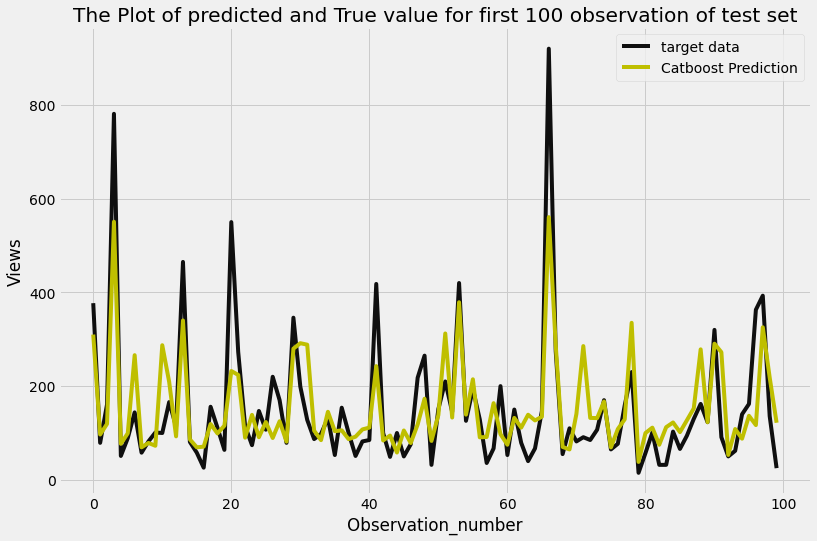

In [ ]:
# plotting the first 200 prediction and test value

obs = list(range(100))
plt.figure(figsize=(12,8))
plt.plot(obs,y_test[0:100], color='#0f0f0f', label='target data')

plt.plot(obs, pred[0:100], color='y', label='Catboost Prediction')
plt.xlabel('Observation_number')
plt.ylabel('Views')
plt.legend()
plt.title('The Plot of predicted and True value for first 100 observation of test set')
plt.savefig('plotperformance.jpeg')
plt.show()

## 5.4 Feature Importance

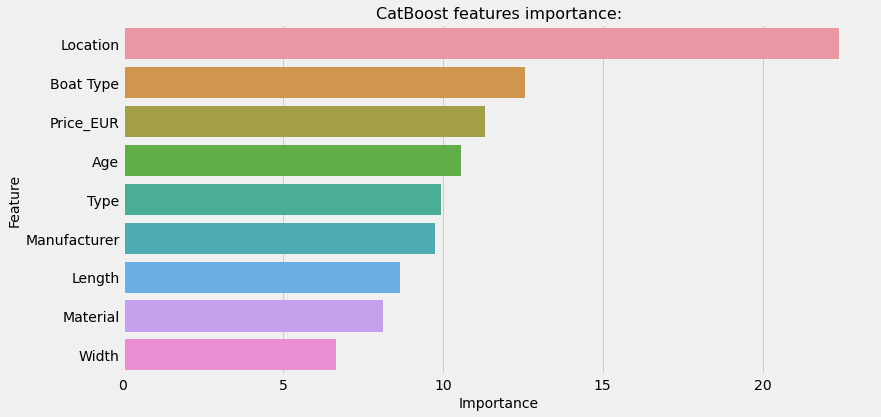

In [ ]:
plt.figure(figsize=(12, 6));
ax = sns.barplot(x="Importances", y="Feature Id", data=model.get_feature_importance(prettified=True));
ax.set_title('CatBoost features importance:', fontsize=16);
ax.set_xlabel('Importance', fontsize=14);
ax.set_ylabel('Feature', fontsize=14);
plt.savefig('Featureimportance.jpeg')
plt.show()

## 5.5 Summary of my machine learning model findings

 The model chosen in this research is Catboost model because it handels well the categorical variables.The Catboost model after tunning achieved an RMSE of 128 and R2 of 0.44.
 
 Location and boat type are the most important features that impact the model's predictive performance followed by Price. On the other hand, Width and Material had the lowest predictive power.
 
 Since on the the objective of this research is also to assess predictive performance to see the possibility to reduce the length of the survey. I can suggest if there is a characteristic to choose to exclude from future survey, I would say based on my findings to exclude material charactristic since the missing values in width column were very lowe but those in "Material" column were very high.

# 6 Conclusion and Recommendation for next Step

## 6.1 Conclusion

The objective of this project was to predict and analyse the boat's  popularity in order to boost traffic in the website by not listing boats that wouldn't have much view.

In the data Cleaning, there were lots of missing value and I did lot's of feature transformation. 

In the statistical analysis I assessed the relationship between the number of views and other characteristics and I found that the correlation between the boat's number of views and age, width, length and price was weak. For the other characteristics such as material, location, I assessed the areas that gets on average the most number of views. This analysis helps explore the areas where there are high number of views.

Finally I build a machine learning model to predict the boat's popularity and my model after hyperparameters tunning achieved and RMSE of 128. On top on that the features the most important were the location and boat type, whereas the features the least important were width and material. This model can help to prevent listing boats that won't get high number of views and the feature importance analysis helps in taking the decision about how to trim this boat survey in the futur.

## 6.2 Recommendation for next Step

- Model can be improved by doing deeper hyperparameters tunning or adding new features if they exist.
- After Optimizing the model, we can deploy it though an API and host the application in the cloud using AWS for exemple.
- In case it's required to trim the survey in order to increase the number of subcribers, I suggest to exclude "Material" characteristic since the had the second lowest performance and this characteristic has lots of missing values (more than 1000). I don't suggest width to exclude (even though it has the lowest performance) because it didn't have lot of missing values in the raw data set.
- If the survey was trimmed, I can do in the futur some statistical tests to see if trimming the survey would increase the number of sign ups.